# SMS Spam Detection Filter using NLTK

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import nltk

In [5]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [*] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

        C:\Users\Sanika\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In the above step, we have downloaded stopwords list using nltk shell

#### What are stopwords?

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

## Dataset Details

The dataset has been downloaded from UCI datasets. The link to download data is: [Spam Collection Dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

In [6]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

#### Counting the number of messages

In [8]:
print(len(messages))

5574


In [9]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

#### Printing the first 10 messages

In [11]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In the above results, you can see that there is a spacing between the word "ham/spam" and the actual message

Due to the spacing we can tell that this is a TSV ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself

Using these labeled ham and spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.

#### Creating a dataframe from the file with two columns - labels and messages

In [12]:
messages = pd.read_csv("SMSSpamCollection",sep="\t",names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Exploring the data based on ham and spam labels

In [23]:
messages.groupby('label',axis=0).describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
messages['length'] = messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


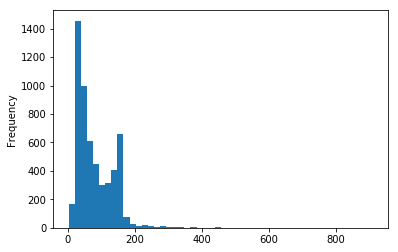

In [26]:
messages['length'].plot(bins=50,kind='hist')

If you see, length of the text goes beyond 800 characters (look at the x axis). This means that there are some messages whose length is more than the others

We can take a look at it

In [27]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


So from the above results we can see that there is a message with 910 characters. Lets take a look at that message to see if the particular message is spam or ham

In [31]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Now lets try to find some distinguishing feature between the messages of two sets of labels - ham and spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C199780>,
      dtype=object)

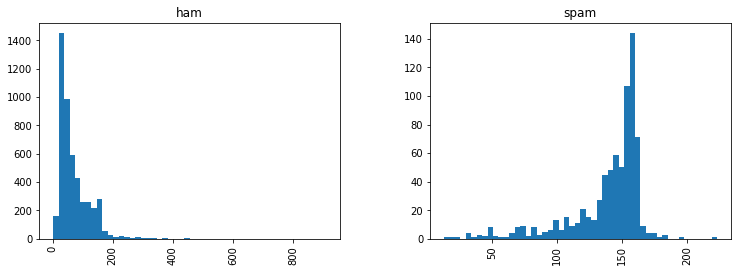

In [32]:
messages.hist(column='length',by='label',bins=50,figsize=(12,4))

We can clearly see from the plots that the spam messages have more characters as compared to the ham messages

## Text Preprocessing

The main issue with our data is that it is all in text format (strings). Most of the classification algorithms need some sort of numerical feature vector in order to perform the classification task. 

There are many methods to convert a corpus (A collection of texts is also sometimes called "corpus") to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

We will be converting the raw messages (sequence of characters)into vectors (sequences of numbers)

#### Creating a function to remove all the punctuations and stopwords

A text processing function is created which will take in a string, and perform the following functions:
1. Remove all the punctuations
2. Remove all stopwords
3. Returns a list of cleaned text

In [34]:
import string

Just trying to build the function step by step by trying out the idea on a string first. 

The first step will be to remove punctuations from the below string

In [35]:
mess = "Sample Message! Notice: it has punctuatuation."

In [36]:
mess

'Sample Message! Notice: it has punctuatuation.'

In [37]:
nopunc_mess = [char for char in mess if char not in string.punctuation]

In [38]:
nopunc_mess

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [39]:
nopunc_mess = ''.join(nopunc_mess)

In [40]:
nopunc_mess

'Sample Message Notice it has punctuatuation'

Now we got rid of the punctuations

The second step will be to remove stopwords from the string

In [42]:
from nltk.corpus import stopwords

In [43]:
# Printing out some stopwords

In [44]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [45]:
nopunc_mess.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuatuation']

In [46]:
# Removing the stopwords

In [48]:
clean_mess = [word for word in nopunc_mess.split() if word.lower() not in stopwords.words('english')]

In [49]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuatuation']

Now both the concepts will be put together in a function

In [50]:
def text_process(mess):
    # Removing the punctuation from the string
    nopunc_mess = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string
    nopunc_mess = ''.join(nopunc_mess)
    
    # Removing any stopwords in the list of words
    return [word for word in nopunc_mess.split() if word.lower() not in stopwords.words('english')]

In [51]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Tokenizing Messages

Now we need to use the text_process function to tokenize the messages

Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want)

In [52]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [54]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Vectorization

We have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:
1. Count how many times does a word occur in each message (Known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

#### Step 1:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix)

#### What is a Sparse Matrix?
A sparse matrix or sparse array is a matrix in which most of the elements are zero

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [60]:
# Print total number of vocab words

In [61]:
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [72]:
message4 = messages['message'][3]

In [73]:
print(message4)

U dun say so early hor... U c already then say...


Now let us take a look at its vector representation

In [74]:
bow4 = bow_transformer.transform([message4])

In [75]:
bow4.shape

(1, 11425)

The above results basically show that there is one row (which is the message row) and there are 11425 columns (which means that there are 11425 words)

In [76]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


The above results show that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. 

Lets analyse which words appear twice

In [77]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


We can now use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages

In [78]:
messages_bow = bow_transformer.transform(messages['message'])

In [79]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [80]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

#### What is TF-IDF?

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [88]:
# Creating an instance of tfidf transformer and fitting it to the bag of words

In [84]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [86]:
tfidf4 = tfidf_transformer.transform(bow4)

In [87]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


The above result is the inverse document frequency and term frequency for a particular message. Which means that we were able to transform a simple word count to an actual tfidf

Now, we can check the inverse document frequency for a particular word. Example: If we want to check the document frequency for the word "university" we can do that in the following manner

In [89]:
tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

Now, we can convert the entire bag of corpus into tfidf corpus

In [91]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [93]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

## Training a Model

Since the messages have been converted into vectors, we can train a model on our data. Naive based classification algorithm can be used to classify the text messages as ham or spam

In [94]:
from sklearn.naive_bayes import MultinomialNB

Creating a Naive Bayes object and trying this object to the vector data of messages. So the first argument of this fit method would be the vectors of messages and the second argument would be the actual data

In [95]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

Now we are try to classify single random message to see how well the algorithm is working

In [99]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


The above result detects that the tfidf4 message is ham and the actual label for that message also shows ham. This means that the model is able to predict the ham vs spam classification

#### Predicting the labels for all the messages

In [100]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [101]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Now, this was just to test the model. We will divide the data into Features and Label, and also divide the data into training and testing data set and then creting a data pipeline

#### Dividing the Data into Features and Labels

In [105]:
X = messages['message']
y = messages['label']

#### Train Test Split

Dividing the data into training and testing data so that the model can be trained on one set of data and tested on the other set of data 

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [107]:
X_train

5529                            What about this one then.
4676    Hi babe its Chloe, how r u? I was smashed on s...
3804    Yup song bro. No creative. Neva test quality. ...
2784         Just arrived, see you in a couple days &lt;3
18      Fine if thats the way u feel. Thats the way ...
4991    Phony £350 award - Todays Voda numbers ending ...
4440                 i want to grasp your pretty booty :)
4363    I can't right this second, gotta hit people up...
5014    Uncle G, just checking up on you. Do have a re...
1697    Sorry man, my stash ran dry last night and I c...
689            Thanks love. But am i doing torch or bold.
3782    Dear friends, sorry for the late information. ...
4299    WELL DONE! Your 4* Costa Del Sol Holiday or £5...
1593    Will it help if we propose going back again to...
4803        Reverse is cheating. That is not mathematics.
5234                                Ok cool. See ya then.
3139                                   Wat r u doing now?
427           

### Creating a Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. 

In [109]:
from sklearn.pipeline import Pipeline

In [110]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing. We can treat it as a model/estimator API:

In [112]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000000C5D9510>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [113]:
predictions = pipeline.predict(X_test)

## Model Evaluation

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1454
        spam       1.00      0.70      0.82       218

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

